# Análise de sobrevivência piscinas municipais

Data was collected from 6749 customers. The Kaplan-Meier estimator was used to gather information about the moment in which the dropout event took place, the Cox's regression coefficient was used to analyse the available variables related with the surviving of the customer in the sports facility, and the logrank test was applied to the significant variables to provide statistical comparison of groups.

The duration of practice was positively related to the number of accesses, week contracted accesses, number of contract renewals, and inscription month increase. On the other hand, practice experience was negatively related to age and week average accesses.

## Variables

- Gender - 1 para Masculino, 0 para Feminino
- Inicio	Data de inicio da inscrição
- Termino	Data de termino da inscrição
- Dtultvisita	Data da ultima visita as instalações obtida pela utilização do cartão no controlo de acessos
- Diassemfrequencia	Nº de dias em que não vinha às instalações até terminar a inscrição ou até 31/Outubro/2017 se a inscrição ainda não tinha terminado nessa data
- Mesesinscricao	Nº de meses da inscrição, ou seja, diferença de meses entre o inicio e o termino
- Volnegocios	Total pago pelo utente no período da sua inscrição
- Freqmedia	Freqmedia obtida pelo nº de frequencias a dividir pelo nº de semanas da sua inscrição, subtraido dos períodos de encerramento (mês de Agosto) quando a inscrição tem mais de 1 época
- natividades	Contagem dos 1 dos campos anteriores (linha 13 a 22)
- nfrequencias	Nº de visitas ao clube durante a sua inscrição
- freqcontratada	Nº de frequências por semana que o utente tinha contratada no ultimo período da sua inscrição (7 = livre trânsito)
- nrenovacoes	Nº de renovações que o utente fez durante a sua inscrição - ATENÇÃO: esta instalação fecha no mês de Agosto, pelo que os Utentes têm de renovar a inscrição para o proximo ano letivo
- nreferencias	Nº de pessoas associadas (familiares, amigos, etc.) também registados como utentes
- classe_desistencia	1 para desistente, 0 para utente ativo


1/TRUE = dead i.e. abandonou
0/FALSE = alive i.e. não abandonou


In [30]:
import lifelines

In [31]:
from IPython.display import HTML

In [32]:
import pandas as pd
dt = pd.read_excel('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/dadosPiscina.xlsx',
                   index_col=0)

In [33]:
## Vamos selecionar os nadadores

dt = dt.loc[dt.atividade_aquaticas == 1]

## Vamos calcular uma variavel mes

dt['mes']=dt['inicio'].str.extract('-(\d\d)', expand=True)
dt['mes']=pd.to_numeric(dt['mes'])

## Descritivas variáveis quantitativas

In [34]:
dt[['idade', 'genero','diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
    'natividades', 'nfrequencias','freqcontratadasemanal', 'nrenovacoes', 'nreferencias','mes','classe_desistencia']].describe()

,idade,genero,diassemfrequencia,mesesinscricao,volnegocios,freqmedia,natividades,nfrequencias,freqcontratadasemanal,nrenovacoes,nreferencias,mes,classe_desistencia
count,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6747.000000,6749.000000,6749.000000,6749.000000,6749.000000
mean,18.686176,0.480960,48.751371,13.300933,161.740485,0.599911,1.074826,29.819825,2.072032,1.038524,0.304490,7.251741,0.577715
std,19.362335,0.499674,73.448122,10.915080,158.559194,0.423833,0.272536,35.389707,1.823724,1.069460,0.553224,3.172694,0.493960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,0.000000,5.000000,4.000000,48.270000,0.300000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,10.000000,0.000000,31.000000,10.000000,107.100000,0.500000,1.000000,17.000000,1.000000,1.000000,0.000000,9.000000,1.000000
75%,32.000000,1.000000,62.000000,20.000000,219.040000,0.800000,1.000000,40.000000,2.000000,2.000000,1.000000,9.000000,1.000000
max,117.000000,1.000000,1073.000000,47.000000,1293.000000,3.940000,3.000000,323.000000,7.000000,4.000000,5.000000,12.000000,1.000000


In [35]:
# Retirar estes
dt = dt.loc[dt.idade < 100 ]

colunasScale=['idade','diassemfrequencia','mesesinscricao','volnegocios','freqmedia','natividades','nfrequencias',
              'freqcontratadasemana','nrenovacoes','nreferencias']
#Transformar classe desistencia em booleana
#dt['classe_desistencia']=dt['classe_desistencia'].map({True:1, False:0})

## Survival Analysis

In [36]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = dt['mesesinscricao']
C = dt['classe_desistencia']

In [37]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6747 entries, 0012D938-1C2B-4B1C-B4A9-0B201126CD22 to FFFAB6CC-28E7-4766-A992-9C55F1DC151E
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datanasc               6747 non-null   object 
 1   idade                  6747 non-null   int64  
 2   genero                 6747 non-null   int64  
 3   inicio                 6747 non-null   object 
 4   termino                6747 non-null   object 
 5   dtultvisita            6747 non-null   object 
 6   diassemfrequencia      6747 non-null   int64  
 7   mesesinscricao         6747 non-null   int64  
 8   volnegocios            6747 non-null   float64
 9   freqmedia              6747 non-null   float64
 10  utilizacao_livre       6747 non-null   int64  
 11  atividade_atletismo    6747 non-null   int64  
 12  atividade_aquaticas    6747 non-null   int64  
 13  atividade_fitness      6747 non-null   int64  

In [38]:
kmf.fit(T,C,label="Swimmers")

<lifelines.KaplanMeierFitter:"Swimmers", fitted with 6747 total observations, 2850 right-censored observations>

## Tabela Sobrevivência

In [39]:
survivalTable = pd.concat([kmf.event_table.reset_index(), kmf.conditional_time_to_event_,kmf.survival_function_.round(decimals=2)], axis=1)
survivalTable.columns = ['event_at', 'removed', 'observed', 'censored', 'entrance', 'at_risk',
       'time to event', 'prob']
survivalTable.head(18)

,event_at,removed,observed,censored,entrance,at_risk,time to event,prob
0.0,0,5,5,0,6747,6747,14.0,1.00
1.0,1,127,52,75,0,6742,14.0,0.99
2.0,2,758,241,517,0,6615,13.0,0.96
3.0,3,439,433,6,0,5857,15.0,0.88
4.0,4,372,340,32,0,5418,16.0,0.83
5.0,5,346,299,47,0,5046,17.0,0.78
6.0,6,319,274,45,0,4700,17.0,0.73
7.0,7,406,356,50,0,4381,20.0,0.67
8.0,8,268,198,70,0,3975,20.0,0.64
9.0,9,240,183,57,0,3707,21.0,0.61


## Mediana sobrevivência

In [44]:
kmf.median_survival_time_

14.0

# Curva de Kaplan-Meier

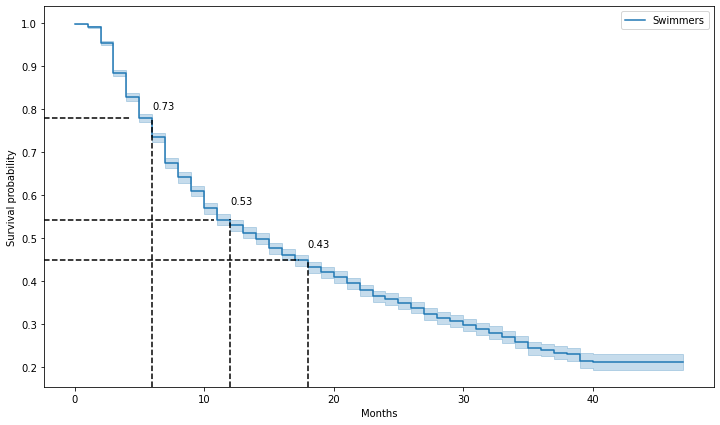

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

plt.rcParams['figure.figsize'] = [12, 7]

ax = kmf.plot()
ax.set_xlabel('Months',fontsize=10)
ax.set_ylabel('Survival probability',fontsize=10)

ax.axvline(x=6,ymax=0.70,linestyle='--',color='black');ax.axhline(y=0.78,xmax=0.129,linestyle='--',color='black')
# 6.0 	0.73
ax.annotate("0.73",xy=(6, 0.7), xytext=(6, 0.8))

ax.axvline(x=12,ymax=0.44,linestyle='--',color='black');ax.axhline(y=0.542,xmax=0.254,linestyle='--',color='black')
# 12.0 	0.53
ax.annotate("0.53",xy=(12, 0.44), xytext=(12, 0.58))

ax.axvline(x=18,ymax=0.33,linestyle='--',color='black');ax.axhline(y=0.45,xmax=0.38,linestyle='--',color='black')
# 18.0 	0.43
ax.annotate("0.43",xy=(18, 0.38), xytext=(18, 0.48))

plt.show()
#plt.savefig('../submissao/figure1.png', dpi=90)
plt.close()

# Número de cliente em risco de abandono

Text(0, 0.5, 'clientes')

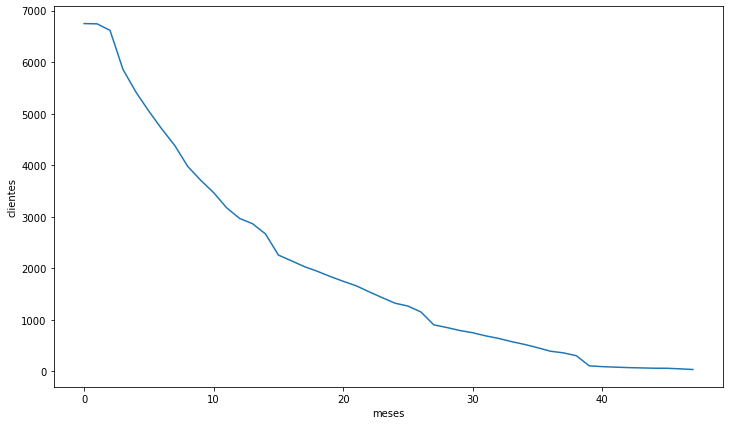

In [46]:
abandono=kmf.event_table.reset_index()

plt.rcParams['figure.figsize'] = [12, 7]
plt.plot(abandono.event_at, abandono.at_risk)
 
plt.xlabel('meses')
plt.ylabel('clientes')
#plt.xlabel()

# Percentagem de clientes

6747


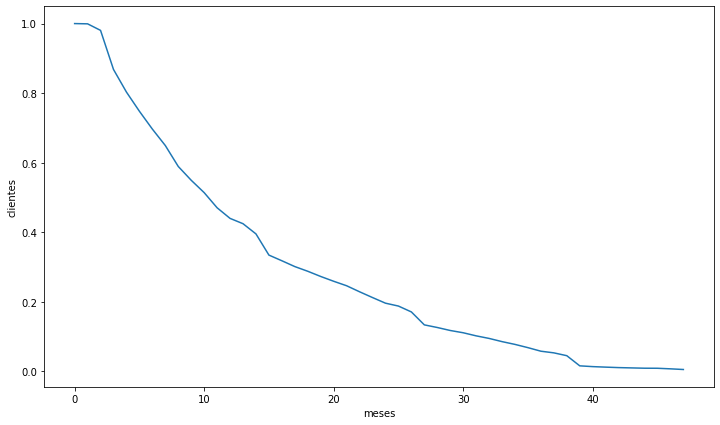

In [47]:
abandono['percentagemClientes']= 0.0
anterior = abandono.at_risk[0:1]
anterior = anterior[0]
print(anterior)

for index, row in abandono.iterrows():
    abandono.at[index, 'percentagemClientes'] = row.at_risk/anterior    

plt.rcParams['figure.figsize'] = [12, 7]
plt.xlabel('meses')
plt.ylabel('clientes')
plt.plot(abandono.event_at, abandono.percentagemClientes)
plt.show()

In [48]:
abandono

,event_at,removed,observed,censored,entrance,at_risk,percentagemClientes
0,0,5,5,0,6747,6747,1.000000
1,1,127,52,75,0,6742,0.999259
2,2,758,241,517,0,6615,0.980436
3,3,439,433,6,0,5857,0.868090
4,4,372,340,32,0,5418,0.803024
5,5,346,299,47,0,5046,0.747888
6,6,319,274,45,0,4700,0.696606
7,7,406,356,50,0,4381,0.649326
8,8,268,198,70,0,3975,0.589151
9,9,240,183,57,0,3707,0.549429


A probabilidade de sobreviver mais de 10 meses é de 50%. A probabilidade de sobreviver 20 meses é de 25%.

# Curva Kaplan-Meier por género

Mediana 0 = 13.0 | Prob sobreviver mais 6 meses S(t) == P(T>t) : 0.7073675240472379
Mediana 1 = 15.0 | Prob sobreviver mais 6 meses S(t) == P(T>t) : 0.7637997509868095


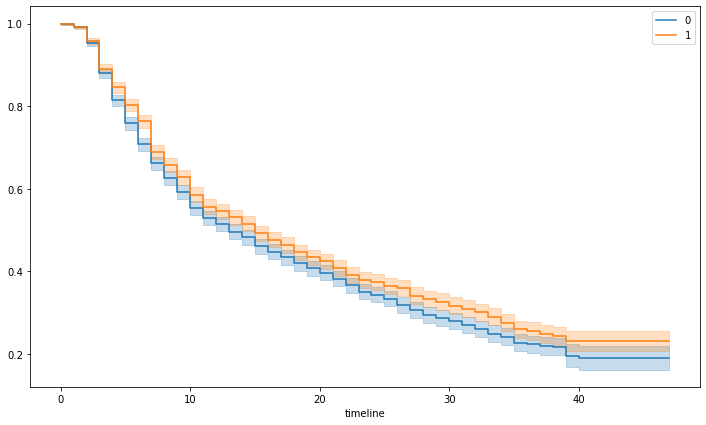

In [50]:
ax = plt.subplot(111)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

for gen in dt['genero'].unique():
    ix = dt['genero'] == gen
    kmf.fit(T.loc[ix], C.loc[ix], label=str(gen))
    ax = kmf.plot(ax=ax)
    print ('Mediana',gen, '=', kmf.median_survival_time_,'| Prob sobreviver mais 6 meses S(t) == P(T>t) :', kmf.predict(6.0))

1 - Masculino / 0 - Feminino

In [51]:
dt.dropna(inplace=True)

In [52]:
T = dt['mesesinscricao']
C = dt['classe_desistencia']

In [53]:
nomes_features= ['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
                  'natividades', 'nfrequencias', 'freqcontratadasemanal', 
                 'nrenovacoes', 'nreferencias', 'classe_desistencia','mes']
dtNadadores = dt[nomes_features].copy()

from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtNadadores,duration_col='mesesinscricao',event_col='classe_desistencia')

<lifelines.CoxPHFitter: fitted with 6745 total observations, 2850 right-censored observations>

In [54]:
%store dtNadadores

Stored 'dtNadadores' (DataFrame)


# Cox Regression

In [55]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 6745 total observations, 2850 right-censored observations>
             duration col = 'mesesinscricao'
                event col = 'classe_desistencia'
      baseline estimation = breslow
   number of observations = 6745
number of events observed = 3895
   partial log-likelihood = -27650.91
         time fit was run = 2021-07-14 15:55:37 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
idade                   0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
genero                 -0.04       0.96       0.03            -0.10             0.03                 0.90                 1.03
diassemfrequencia       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
volnegocios            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
freqmedia               0.59       1.81       0.06             0.49             0.70                 1.62                 2.02
natividades            -0.04       0.96       0.07            -0.18             0.10                 0.84                 1.10
nfrequencias           -0.02       0.98       0.00            -0.03            -0.02                 0.97                 0.98
freqcontratadasemanal  -0.09       0.91       0.01            -0.11            -0.07                 0.90                 0.93
nrenovacoes            -1.84       0.16       0.04            -1.91            -1.77                 0.15                 0.17
nreferencias           -0.03       0.97       0.03            -0.09             0.03                 0.91                 1.03
mes                    -0.15       0.86       0.01            -0.17            -0.14                 0.85                 0.87

                           z      p   -log2(p)
covariate                                     
idade                   6.40 <0.005      32.62
genero                 -1.12   0.26       1.94
diassemfrequencia       5.57 <0.005      25.22
volnegocios            -4.07 <0.005      14.37
freqmedia              10.66 <0.005      85.77
natividades            -0.56   0.58       0.79
nfrequencias          -13.85 <0.005     142.57
freqcontratadasemanal -10.03 <0.005      76.23
nrenovacoes           -52.30 <0.005        inf
nreferencias           -1.06   0.29       1.79
mes                   -28.86 <0.005     606.16
---
Concordance = 0.88
Partial AIC = 55323.82
log-likelihood ratio test = 7904.62 on 11 df
-log2(p) of ll-ratio test = inf

# Curvas sobrevivência considerando as variáveis mais relevantes na regressão de cox

The significant predictors age, maccess, nentries, cfreq, nrenewals and imonth where analysed using the logrank test, where we identified significant differences between the groups in each variable represented in Table 4: age (χ2=204.78, p<0.01),  maccess (χ2=294.44 p<0.01), nentries (χ2=3721.13, p<0.01), cfreq (χ2=58.34, p<0.01), nrenewals (χ2=6264.73, p<0.01) and imonth (χ2=86.33, p<0.01). The probability of surviving more than 12 months and survival median for each group is also represented, for example, swimmers with less than 0.3 average access have a probability of surviving more than 12 months of 40.56% and a survival median of 9 months

## age

Utilizar os escalões de idade OMS

| Escalões      | Idades        |
| ------------- |:-------------:|
| Infância      |  até 10 anos  |
| Adolescência  |  10-20        |
| Idade adulta  |  20-40        |
| Meia Idade    |  40-60        |
| Terceira Idade|  +60          |

In [56]:
dt['idade'].describe()

count    6745.000000
mean       18.655300
std        19.292012
min         0.000000
25%         5.000000
50%        10.000000
75%        32.000000
max        88.000000
Name: idade, dtype: float64

In [57]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia', 'mes'],
      dtype='object')

Vamos dividir a distribuicao idades em 5 partes

In [27]:
#dt['escaloesIdade']=''
#escaloesIdade=[10,20,40,60]
#
#for index, cliente in dt.iterrows():
#    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
#    if cliente['idade']<=10:
#        dt.at[index,'escaloesIdade']='ate 10'
#    elif (cliente['idade']>10) & (cliente['idade']<=20):
#        dt.at[index,'escaloesIdade']='10 a 20'
#    elif (cliente['idade']>20) & (cliente['idade']<=40):
#        dt.at[index,'escaloesIdade']='21 a 40'
#    elif (cliente['idade']>40) & (cliente['idade']<=60):
#        dt.at[index,'escaloesIdade']='41 a 60'
#    elif (cliente['idade']>60):
#        dt.at[index,'escaloesIdade']='mais 60'

In [58]:
dt.idade.describe()

count    6745.000000
mean       18.655300
std        19.292012
min         0.000000
25%         5.000000
50%        10.000000
75%        32.000000
max        88.000000
Name: idade, dtype: float64

In [59]:
dt['escaloesIdade']=''
escaloesIdade=[10,20,40,60]

for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['idade']<=5:
        dt.at[index,'escaloesIdade']='until 5'
    elif (cliente['idade']>5) & (cliente['idade']<=10):
        dt.at[index,'escaloesIdade']='5 to 10'
    elif (cliente['idade']>10) & (cliente['idade']<=32):
        dt.at[index,'escaloesIdade']='10 a 32'
    elif (cliente['idade']>32):
        dt.at[index,'escaloesIdade']='more than 32'

In [60]:
dt.escaloesIdade.unique()

array(['10 a 32', '5 to 10', 'until 5', 'more than 32'], dtype=object)

In [61]:
dt.groupby(dt['escaloesIdade']).count().iloc[:,1]

escaloesIdade
10 a 32         1520
5 to 10         1688
more than 32    1666
until 5         1871
Name: idade, dtype: int64

10 a 32  predict survival 12 months: 0.43057257599984217 : median  10.0
5 to 10  predict survival 12 months: 0.6489208673026031 : median  22.0
until 5  predict survival 12 months: 0.5491332303030675 : median  15.0
more than 32  predict survival 12 months: 0.48348093995777114 : median  11.0


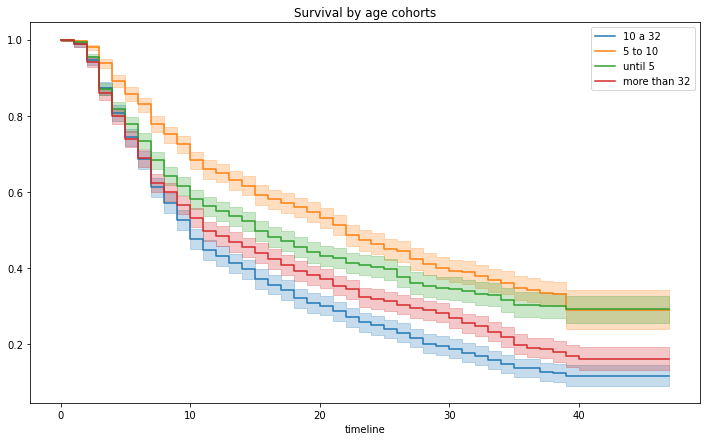

In [63]:
ax = plt.subplot(111)
import matplotlib.pyplot as plt
import numpy as np
#vamos considerar só 0,1,2,3
escaloesIdade=dt['escaloesIdade'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for escalao in escaloesIdade:
    ix = dt['escaloesIdade'] == escalao
    kmf.fit(T.loc[ix], C.loc[ix], label=str(escalao))
    ax = kmf.plot(ax=ax)
    print(str(escalao),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_survival_time_)

plt.title('Survival by age cohorts');

In [64]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt.escaloesIdade,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         204.78 <0.005    144.19

In [65]:
from lifelines.statistics import pairwise_logrank_test

results=pairwise_logrank_test(event_durations=T,groups=dt.escaloesIdade,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                           test_statistic      p  -log2(p)
10 a 32      5 to 10               192.30 <0.005    142.85
             more than 32           13.57 <0.005     12.09
             until 5                67.91 <0.005     52.37
5 to 10      more than 32          101.89 <0.005     77.17
             until 5                26.39 <0.005     21.77
more than 32 until 5                23.63 <0.005     19.71

## maccess

In [66]:
dt.freqmedia.describe()

count    6745.000000
mean        0.600197
std         0.423792
min         0.010000
25%         0.300000
50%         0.510000
75%         0.800000
max         3.940000
Name: freqmedia, dtype: float64

In [67]:
dt['esc_maccess']=''
for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['freqmedia'] <= 0.3:
        dt.at[index,'esc_maccess']='maccess less than 0.3'
    elif (cliente['freqmedia'] > 0.3) & (cliente['freqmedia'] < 0.51):
        dt.at[index,'esc_maccess']='maccess greather than 0.3 and less 0.51'
    elif (cliente['freqmedia'] >= 0.51) & (cliente['freqmedia'] < 0.8):
        dt.at[index,'esc_maccess']='maccess greather than 0.51 and less 0.8'
    elif (cliente['freqmedia'] >= 0.8):
        dt.at[index,'esc_maccess']='maccess greather than 0.8'

In [68]:
dt['esc_maccess'].value_counts()

maccess less than 0.3                      1740
maccess greather than 0.8                  1698
maccess greather than 0.51 and less 0.8    1675
maccess greather than 0.3 and less 0.51    1632
Name: esc_maccess, dtype: int64

In [69]:
dt['esc_maccess'].unique()

array(['maccess greather than 0.51 and less 0.8',
       'maccess greather than 0.3 and less 0.51',
       'maccess greather than 0.8', 'maccess less than 0.3'], dtype=object)

Vamos considerar 3,4 e 5 superior a duas vezes por semana

maccess greather than 0.51 and less 0.8  predict survival 12 months: 0.5979748810760623 : median  20.0
maccess greather than 0.3 and less 0.51  predict survival 12 months: 0.5140966461680566 : median  13.0
maccess greather than 0.8  predict survival 12 months: 0.6244376660357491 : median  21.0
maccess less than 0.3  predict survival 12 months: 0.4056633508325905 : median  9.0


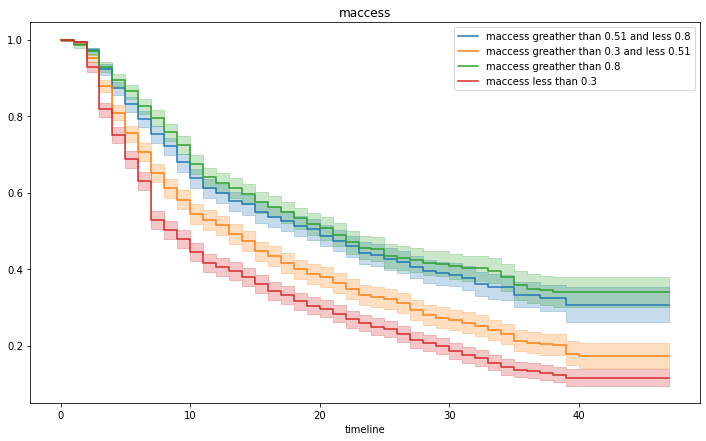

In [71]:
ax = plt.subplot(111)
#vamos considerar só 0,1,2,3
idas=dt['esc_maccess'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for ida in idas:
    ix = dt['esc_maccess'] == ida
    kmf.fit(T.loc[ix], C.loc[ix], label=str(ida))
    ax = kmf.plot(ax=ax)
    print(str(ida),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_survival_time_)
plt.title('maccess');

In [72]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_maccess,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         294.44 <0.005    208.62

In [73]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esc_maccess,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                                                 test_statistic      p  -log2(p)
maccess greather than 0.3 and less 0.51 maccess greather than 0.51 and less 0.8           48.81 <0.005     38.36
                                        maccess greather than 0.8                         70.70 <0.005     54.41
                                        maccess less than 0.3                             40.72 <0.005     32.41
maccess greather than 0.51 and less 0.8 maccess greather than 0.8                          2.46   0.12      3.10
                                        maccess less than 0.3                            179.86 <0.005    133.82
maccess greather than 0.8               maccess less than 0.3                            216.01 <0.005    160.03

O número idas com uma retenção maior é 2 ou mais. A tendência de retenção maior só se apresenta depois dos 10 meses. O abandono depois dos 10 meses é menor nos clientes que vão em média 1 a 2 vezes ou mais. As estratégias devem estar focadas na manutenção do cliente nos primeiros 10 meses e tentar que vão em média pelo menos 1 vez por semana.

## nentries

In [74]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia', 'mes', 'escaloesIdade', 'esc_maccess'],
      dtype='object')

In [75]:
dt.nfrequencias.describe()

count    6745.000000
mean       29.835434
std        35.394236
min         1.000000
25%         6.000000
50%        17.000000
75%        40.000000
max       323.000000
Name: nfrequencias, dtype: float64

In [76]:
dt['esc_entries']=''
for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['nfrequencias'] <= 6:
        dt.at[index,'esc_entries']='until 6'
    elif (cliente['nfrequencias'] > 6) & (cliente['nfrequencias'] < 17):
        dt.at[index,'esc_entries']='6 to 17'
    elif (cliente['nfrequencias'] >= 17) & (cliente['nfrequencias'] < 40):
        dt.at[index,'esc_entries']='17 to 40'
    elif (cliente['nfrequencias'] >= 40):
        dt.at[index,'esc_entries']='more than 40'
       
    #dt.at[index,'idas']=np.around(cliente['nfrequencias'],decimals=1)

In [77]:
dt['esc_entries'].value_counts()

until 6         1720
more than 40    1718
17 to 40        1665
6 to 17         1642
Name: esc_entries, dtype: int64

In [78]:
dt['esc_entries'].unique()

array(['until 6', '17 to 40', '6 to 17', 'more than 40'], dtype=object)

Vamos considerar 3,4 e 5 superior a duas vezes por semana

until 6  predict survival 12 months: 0.12141345870340657 : median  4.0
17 to 40  predict survival 12 months: 0.6370290037312688 : median  17.0
6 to 17  predict survival 12 months: 0.2852619553840528 : median  7.0
more than 40  predict survival 12 months: 0.9186106530361037 : median  39.0


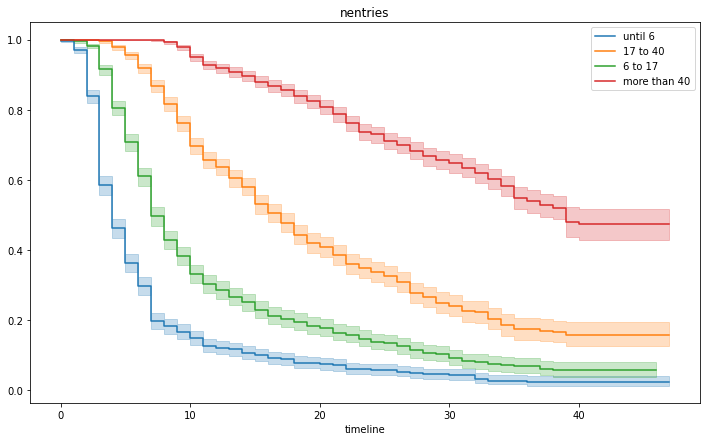

In [80]:
ax = plt.subplot(111)
#vamos considerar só 0,1,2,3
idas=dt['esc_entries'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for ida in idas:
    ix = dt['esc_entries'] == ida
    kmf.fit(T.loc[ix], C.loc[ix], label=str(ida))
    ax = kmf.plot(ax=ax)
    print(str(ida),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_survival_time_)
plt.title('nentries');

In [81]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_entries,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        3721.13 <0.005       inf

In [82]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esc_entries,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                           test_statistic      p  -log2(p)
17 to 40     6 to 17               429.84 <0.005    314.77
             more than 40          625.76 <0.005    456.37
             until 6              1315.64 <0.005    954.54
6 to 17      more than 40         1706.42 <0.005       inf
             until 6               318.29 <0.005    234.09
more than 40 until 6              2582.34 <0.005       inf

O número idas com uma retenção maior é 2 ou mais. A tendência de retenção maior só se apresenta depois dos 10 meses. O abandono depois dos 10 meses é menor nos clientes que vão em média 1 a 2 vezes ou mais. As estratégias devem estar focadas na manutenção do cliente nos primeiros 10 meses e tentar que vão em média pelo menos 1 vez por semana.

## cfreq

In [83]:
dt.freqcontratadasemanal.describe()

count    6745.000000
mean        2.072350
std         1.823901
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: freqcontratadasemanal, dtype: float64

In [84]:
dt.freqcontratadasemanal.unique()

array([1., 2., 7., 3., 4., 6.])

In [85]:
dt.freqcontratadasemanal.value_counts()

1.0    3410
2.0    2485
7.0     755
3.0      69
4.0      25
6.0       1
Name: freqcontratadasemanal, dtype: int64

Considerando a distribuicao foram divididos em 1,2 e 3+

In [86]:
dt['esc_cfreq']=''

for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['freqcontratadasemanal']<=1:
        dt.at[index,'esc_cfreq']='cfreq 1'
    elif cliente['freqcontratadasemanal']==2:
        dt.at[index,'esc_cfreq']='cfreq 2'
    elif cliente['freqcontratadasemanal']>=3:
        dt.at[index,'esc_cfreq']='cfreq 3'


In [87]:
dt.esc_cfreq.value_counts()

cfreq 1    3410
cfreq 2    2485
cfreq 3     850
Name: esc_cfreq, dtype: int64

cfreq 1  predict survival 12 months: 0.5377226135134687 : median  15.0
cfreq 2  predict survival 12 months: 0.483370910687046 : median  11.0
cfreq 3  predict survival 12 months: 0.6283866126401795 : median  21.0


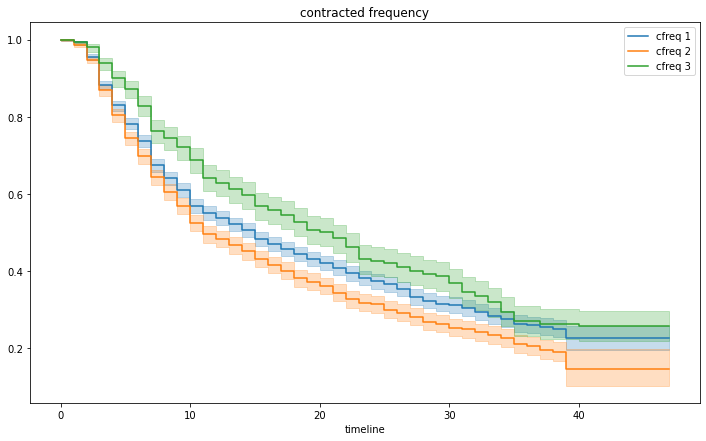

In [88]:
ax = plt.subplot(111)
cfreqs=dt.esc_cfreq.unique()

plt.rcParams['figure.figsize'] = [12, 7]
for cfreq in cfreqs:
    ix = dt['esc_cfreq'] == cfreq
    kmf.fit(T.loc[ix], C.loc[ix],label=str(cfreq))
    ax = kmf.plot(ax=ax)
    print(str(cfreq),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_survival_time_)
plt.title('contracted frequency')
T.loc;

Contratar 3 ou mais frequências a sobrevivência é maior. Contratar 2 é menor do que contratar só uma frequência. Existem várias questões como a habituação à prática desportiva e quem tem a intenção de ir 3 ou mais vezes tem uma maior motivação.

Podemos abordar a intenção para a prática desportiva ser maior e a retenção também ser maior.

In [89]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_cfreq,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          53.33 <0.005     38.47

Existem diferenças nas curvas de sobrevivência

In [90]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esc_cfreq,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                 test_statistic      p  -log2(p)
cfreq 1 cfreq 2           21.57 <0.005     18.16
        cfreq 3           15.44 <0.005     13.52
cfreq 2 cfreq 3           50.15 <0.005     39.36

Existem diferenças entre todas as curvas de sobrevivência

## nrenewals

In [91]:
dt.nrenovacoes.describe()

count    6745.000000
mean        1.038992
std         1.069552
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: nrenovacoes, dtype: float64

In [92]:
dt.nrenovacoes.unique()

array([0, 1, 2, 4, 3])

In [93]:
dt.nrenovacoes.value_counts()

0    2803
1    1752
2    1366
3     772
4      52
Name: nrenovacoes, dtype: int64

In [94]:
dt['esc_nrenewals'] = 0

In [95]:
dt['esc_nrenewals']=''

for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['nrenovacoes'] == 0:
        dt.at[index,'esc_nrenewals']='renewals 0'
    elif cliente['nrenovacoes'] == 1:
        dt.at[index,'esc_nrenewals']='renewals 1'
    elif cliente['nrenovacoes'] == 2:
        dt.at[index,'esc_nrenewals']='renewals 2'
    elif cliente['nrenovacoes']>2:
        dt.at[index,'esc_nrenewals']='renewals 2+'

In [96]:
dt.esc_nrenewals.value_counts()

renewals 0     2803
renewals 1     1752
renewals 2     1366
renewals 2+     824
Name: esc_nrenewals, dtype: int64

In [97]:
dt.esc_nrenewals.unique()

array(['renewals 0', 'renewals 1', 'renewals 2', 'renewals 2+'],
      dtype=object)

renewals 0  predict survival 12 months: 0.019021929079282563 : median  5.0
renewals 1  predict survival 12 months: 0.6987873619361521 : median  16.0
renewals 2  predict survival 12 months: 0.8549310063701384 : median  27.0
renewals 2+  predict survival 12 months: 1.0 : median  inf


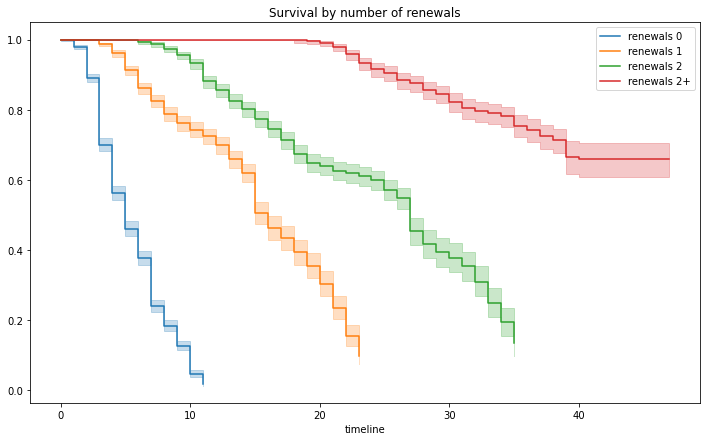

In [98]:
ax = plt.subplot(111)
nrenewals=dt.esc_nrenewals.unique()

for nrenewal in nrenewals:
    ix = dt['esc_nrenewals'] == nrenewal
    kmf.fit(T.loc[ix], C.loc[ix],label=str(nrenewal))
    ax = kmf.plot(ax=ax)
    print(str(nrenewal),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_survival_time_)
plt.title('Survival by number of renewals')
T.loc;

In [99]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_nrenewals,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        6264.73 <0.005       inf

Existem diferenças nas curvas de sobrevivência

In [100]:
results=pairwise_logrank_test(event_durations=T,groups=dt.nrenovacoes,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
     test_statistic      p  -log2(p)
0 1         2310.12 <0.005       inf
  2         2991.50 <0.005       inf
  3         2085.62 <0.005       inf
  4          220.46 <0.005    163.26
1 2          414.49 <0.005    303.67
  3         1016.39 <0.005    738.49
  4          117.55 <0.005     88.57
2 3          463.07 <0.005    338.79
  4           73.02 <0.005     56.11
3 4            0.83   0.36      1.46

Existem diferenças entre todas as curvas de sobrevivência

## imonth

In [101]:
dt['mes'].unique()

array([ 9, 10,  6,  7,  2, 12,  4,  3,  1,  5, 11,  8])

In [102]:
dt.mes.describe()

count    6745.000000
mean        7.251001
std         3.173279
min         1.000000
25%         4.000000
50%         9.000000
75%         9.000000
max        12.000000
Name: mes, dtype: float64

In [103]:
dt['mes'].value_counts()

9     2794
10     830
3      487
2      450
1      420
11     403
4      383
5      339
6      264
7      203
12     160
8       12
Name: mes, dtype: int64

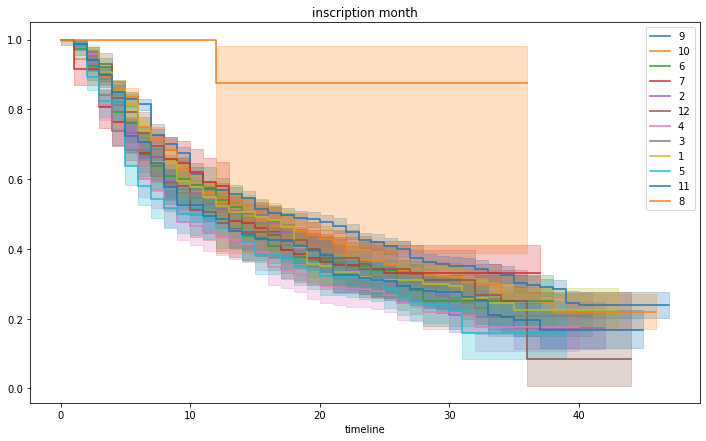

In [104]:
ax = plt.subplot(111)
import matplotlib.pyplot as plt
import numpy as np
#vamos considerar só 0,1,2,3
meses=dt['mes'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for mes in meses:
    ix = dt['mes'] == mes
    kmf.fit(T.loc[ix], C.loc[ix], label=str(mes))
    ax = kmf.plot(ax=ax)
plt.title('inscription month');

O gráfico fica muito confuso vamos agrupar por trimestre

In [105]:
results=multivariate_logrank_test(event_durations=T,groups=dt.mes,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 11
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         106.29 <0.005     56.47

In [106]:
results=pairwise_logrank_test(event_durations=T,groups=dt.mes,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
       test_statistic      p  -log2(p)
1  2             0.69   0.40      1.30
   3             1.23   0.27      1.91
   4             8.44 <0.005      8.09
   5             8.39 <0.005      8.05
   6             1.26   0.26      1.93
   7             0.10   0.76      0.40
   8             5.23   0.02      5.49
   9            10.36 <0.005      9.60
   10            0.85   0.36      1.48
   11            1.10   0.29      1.77
   12            0.05   0.83      0.27
2  3             0.08   0.78      0.37
   4             5.35   0.02      5.60
   5             2.91   0.09      3.50
   6             0.12   0.73      0.45
   7             0.03   0.87      0.20
   8             5.59   0.02      5.79
   9            20.52 <0.005     17.37
   10            5.35   0.02      5.59
   11            0.10   0.75      0.41
   12            0.27   0.61      0.72
3  4             4.09   0.04      4.54
   5             3.12   0.08      3.69
   6             0.04   0.84      0.26
   7             0.30   0.59      0.77
   8             5.64   0.02      5.83
   9            23.01 <0.005     19.24
   10            6.17   0.01      6.26
   11            0.03   0.86      0.22
   12            0.24   0.63      0.68
4  5             0.00   0.97      0.04
   6             2.81   0.09      3.41
   7             4.56   0.03      4.93
   8             7.25   0.01      7.14
   9            50.25 <0.005     39.42
   10           20.82 <0.005     17.59
   11            4.34   0.04      4.75
   12            4.40   0.04      4.80
5  6             1.97   0.16      2.64
   7             2.35   0.13      2.99
   8             6.94   0.01      6.89
   9            44.62 <0.005     35.28
   10           17.44 <0.005     15.04
   11            3.38   0.07      3.92
   12            3.18   0.07      3.74
6  7             0.09   0.77      0.38
   8             4.94   0.03      5.25
   9            11.79 <0.005     10.71
   10            3.40   0.07      3.94
   11            0.00   0.98      0.03
   12            0.12   0.73      0.46
7  8             4.72   0.03      5.07
   9             4.26   0.04      4.68
   10            0.85   0.36      1.48
   11            0.37   0.54      0.88
   12            0.11   0.75      0.42
8  9             4.23   0.04      4.66
   10            4.94   0.03      5.26
   11            5.94   0.01      6.08
   12            6.24   0.01      6.32
9  10            6.52   0.01      6.55
   11           23.09 <0.005     19.30
   12            5.21   0.02      5.48
10 11            6.73   0.01      6.72
   12            1.12   0.29      1.78
11 12            0.28   0.59      0.75

In [107]:
T = dt["mesesinscricao"]
E = dt["classe_desistencia"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"8", fitted with 6745 total observations, 2850 right-censored observations>

In [108]:
### vamos calcular por trimestres
dt.loc[dt['mes'].isin([1,2,3]),'trimestre']='Jan, Fev and Mar'
dt.loc[dt['mes'].isin([4,5,6]),'trimestre']='Apr, May, Jun'
dt.loc[dt['mes'].isin([7,8,9]),'trimestre']='Jul, Aug, Set'
dt.loc[dt['mes'].isin([10,11,12]),'trimestre']='Oct, Nov, Dez'

In [109]:
dt.trimestre.value_counts()

Jul, Aug, Set       3009
Oct, Nov, Dez       1393
Jan, Fev and Mar    1357
Apr, May, Jun        986
Name: trimestre, dtype: int64

In [110]:
dt['trimestre'].unique()

array(['Jul, Aug, Set', 'Oct, Nov, Dez', 'Apr, May, Jun',
       'Jan, Fev and Mar'], dtype=object)

Jul, Aug, Set  predict survival 12 months: 0.5702275005654139 : median  16.0
Oct, Nov, Dez  predict survival 12 months: 0.5128328829165126 : median  13.0
Apr, May, Jun  predict survival 12 months: 0.47059328513462945 : median  11.0
Jan, Fev and Mar  predict survival 12 months: 0.5195161809660498 : median  15.0


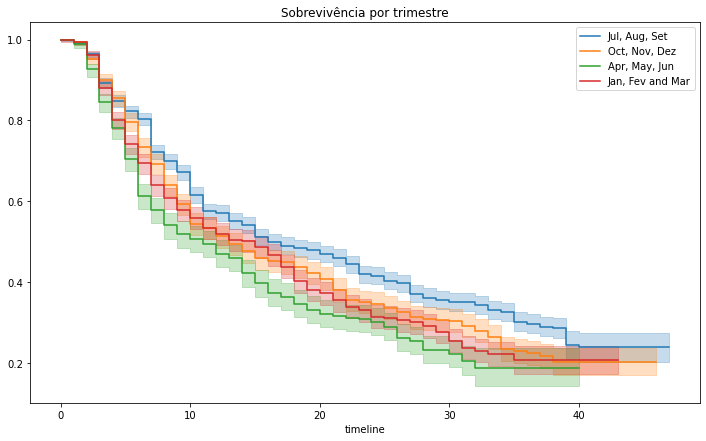

In [111]:
ax = plt.subplot(111)
#vamos considerar só 0,1,2,3
trimestres=dt['trimestre'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for trimestre in trimestres:
    ix = dt['trimestre'] == trimestre
    kmf.fit(T.loc[ix], C.loc[ix], label=str(trimestre))
    ax = kmf.plot(ax=ax)
    print(str(trimestre),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_survival_time_)

plt.title('Sobrevivência por trimestre');

A sobrevivência por trimestre varia. O trimestre julho, agosto e setembro tem uma sobrevivência maior. Quem começa depois do verão ou inicio do ano apresenta uma curva de sobrevivência menor.

Existem diferenças nas curvas de sobrevivência

In [112]:
results=multivariate_logrank_test(event_durations=T,groups=dt.trimestre,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          86.33 <0.005     59.37

In [113]:
results=pairwise_logrank_test(event_durations=T,groups=dt.trimestre,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                   test_statistic      p  -log2(p)
Apr, May, Jun    Jan, Fev and Mar            9.13 <0.005      8.63
                 Jul, Aug, Set              74.08 <0.005     56.89
                 Oct, Nov, Dez              19.80 <0.005     16.82
Jan, Fev and Mar Jul, Aug, Set              34.11 <0.005     27.52
                 Oct, Nov, Dez               2.17   0.14      2.83
Jul, Aug, Set    Oct, Nov, Dez              19.83 <0.005     16.85

Existem diferenças entre todas as curvas de sobrevivência